Exact integral: 0.33333333333333337
N = 2: Trapezoidal approximation = 0.375
N = 3: Trapezoidal approximation = 0.35185185185185186
N = 4: Trapezoidal approximation = 0.34375
N = 5: Trapezoidal approximation = 0.3400000000000001
N = 6: Trapezoidal approximation = 0.3379629629629629
N = 7: Trapezoidal approximation = 0.33673469387755095
N = 8: Trapezoidal approximation = 0.3359375
N = 9: Trapezoidal approximation = 0.33539094650205753
N = 10: Trapezoidal approximation = 0.3350000000000001
N = 11: Trapezoidal approximation = 0.33471074380165294
N = 12: Trapezoidal approximation = 0.3344907407407407
N = 13: Trapezoidal approximation = 0.334319526627219
N = 14: Trapezoidal approximation = 0.3341836734693877
N = 15: Trapezoidal approximation = 0.3340740740740741
N = 16: Trapezoidal approximation = 0.333984375
N = 17: Trapezoidal approximation = 0.3339100346020761
N = 18: Trapezoidal approximation = 0.3338477366255144
N = 19: Trapezoidal approximation = 0.33379501385041543
N = 20: Trapezoida

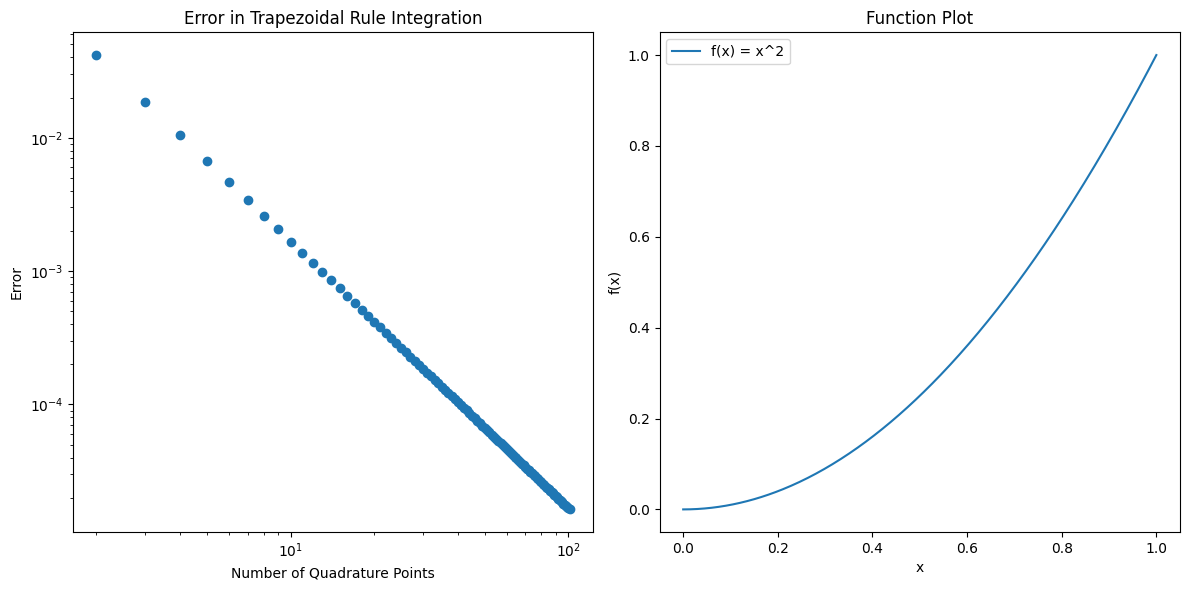

Convergence order: 2.000000000000654


In [1]:
def trapezoidal(func, a, b, N):
    """
    Numerical quadrature based on the trapezoidal rule.
    
    Parameters:
    func : function
        The function to integrate, handle to y = f(x).
    a : float
        The lower bound of the integration interval.
    b : float
        The upper bound of the integration interval.
    N : int
        The number of subintervals (N+1 points).
    """
    from numpy import linspace, sum
    
    # Quadrature nodes
    x = linspace(a, b, N + 1)
    h = x[1] - x[0]
    
    # Quadrature weights: internal nodes: w = 1, boundary nodes: w = 0.5
    I = sum(func(x[1:-1])) + 0.5 * (func(x[0]) + func(x[-1]))
    
    return I * h

if __name__ == "__main__":
    import matplotlib.pyplot as plt
    from scipy import integrate
    from numpy import array, linspace, size, log, polyfit
    import numpy as np

    # Define a function and an interval
    f = lambda x: x**2
    left = 0.0
    right = 1.0

    # Exact integration with scipy.integrate.quad
    exact, e = integrate.quad(f, left, right)
    print(f"Exact integral: {exact}")

    # Trapezoid rule for different number of quadrature points
    N = linspace(2, 101, 100)
    res = array([trapezoidal(f, left, right, int(n)) for n in N])
    err = abs(res - exact)

    # Print the trapezoidal approximations
    for n, approximation in zip(N, res):
        print(f"N = {int(n)}: Trapezoidal approximation = {approximation}")

    # Plotting error vs. number of quadrature points
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.loglog(N, err, 'o')
    plt.xlabel('Number of Quadrature Points')
    plt.ylabel('Error')
    plt.title('Error in Trapezoidal Rule Integration')

    # Plotting the function
    x_vals = np.linspace(left, right, 400)
    y_vals = f(x_vals)
    
    plt.subplot(1, 2, 2)
    plt.plot(x_vals, y_vals, label='f(x) = x^2')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.title('Function Plot')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Linear fit to determine convergence order
    p = polyfit(log(N), log(err), 1)
    
    # Output the convergence order
    print("Convergence order:", -p[0])